
# CSCE633 Fall 2022
# Machine Learning Homework 2

Total 100 pts

Instructor: Yoonsuck Choe

September 14, 2022



**Student name:** Chauhan, Ashutosh

---


# Common instructions (Read carefully)

Hint: Go to View $\rightarrow$ Collapse sections to quickly jump to the problems you are working on. 

**Submission:**

1. Rename the file to **633-22Fall Machine Learning HW2 - lastname firstname.ipynb**.
2. After you complete each section, "Save and pin" the revision. (**File -> Save and pin revision**). 
> There will be a 20-point penalty for not including revision history in the submission as instructed below.
3. When you're ready to submit, 
> 1. download the ipynb file (**File -> Download .ipynb**).
> 2. take screenshot of revision history, by comparing each successive pinned revisions (there will be several of these: final vs. latest pin, latest pin vs. previous pin, etc.). (**File -> Revision history**, then click on the radio buttons for pinned revisions to compare. Scroll down to the part that shows the major revised part, and take a screenshot. No need to show the entire revision history.)
>> Important: Unselect "[ ] Show output" to suppress diff of execution outputs.
>> Jupyter notebook: If you're using Jupyter notebook on your local machine, run %history -g -f filename.log  and submit the log file. 
> 3. submit a zip file **lastname-firstname.zip** containing the ipynb file and all revision screenshots.

**Using the markdown language in the "text" boxes:**

Note: See https://colab.research.google.com/notebooks/markdown_guide.ipynb#scrollTo=70pYkR9LiOV0 for how to use the markdown when writing your answer in the text boxes.


**NEW: Including images/screenshots**

When including screenshots directly into the text cell, the markup source can get too long. To avoid this, you can upload your images to google drive, make them publicly viewable, get the share link, get the id string  from the link (for example, 1IDUkDGqQ1xSKOT3Wg8SKgAlKsDIdUQUy), and insert a tag like below:  
```
<img src="https://drive.google.com/uc?export=view&id=1IDUkDGqQ1xSKOT3Wg8SKgAlKsDIdUQUy"> 
```



# Section I. Deterministic Case (total 70 points)

---



Consider the following reinforcement learning problem.

<figure>
<center>
<img src="https://github.com/yschoe/pub-data/blob/main/grid-goal2-v2.png?raw=true">
<figcaption>Figure 1</figcaption></center>
</figure>


*   There are 12 states, and the actions are $\{ up, down, left, right \}$. Legal actions are those that go to the immediate neighbor, horizontally or vertically (but not diagonally). State $s_2$ is the goal state, and all actions here lead back to itself with reward 0.

*   The rewards for all action are 0, except for all actions that lead into $s_2$, which are 100 (as shown in the figure).

*   In all cases, assume $\gamma = 0.9$.

* Initially, all $Q(s,a) = 0$.




# Problem 1 (Written: 10pts)

**Problem 1 (Written: 10pts):**

Consider the state action sequence of ($s_9$,up), ($s_5$, right), ($s_6$, up), and suppose the $Q(s,a)$ values were updated during each move. 

(1) With initial $Q(s,a)=0$ for all $(s,a)$, after one such pass, what would the resulting $Q(s,a)$ values be? 
* Note: Since one such pass has three actions, three $Q(s,a)$ values will be updated. 
* Note: Some values may be updated from 0 to 0, but this still counts as an update.  

(2) After two such passes, what would be the resulting $Q(s,a)$ values?

(3) After three such passes, what would be the resulting $Q(s,a)$ values?

(4) After four such passes, what would be the resulting $Q(s,a)$ values?


**Answer**

(1) (S9,up): 0, (s5, right): 0 , (s6,up): 100

(2) (S9,up): 0, (s5, right): 90 , (s6,up): 100

(3) (S9,up): 81, (s5, right): 90 , (s6,up): 100

(4) (S9,up): 81, (s5, right): 90 , (s6,up): 100





# Problem 2 (Written: 10pts)

**Problem 2 (Written: 10pts):**

(1) Manually compute the optimal $V^*(s)$ for all states $s_0, s_1, ... s_{11}$. See slide04.pdf, page 14. 

* The optimal policy $\pi^*$ is pretty straight-forward: Action that takes you to the next state that is one of the shortest path to the goal state (there could be one, or two or more such paths, depending on yout start state). 

* It is best if you start from $s_2$ and work backward: $s_2$, then all states that can reach $s_2$ in one move (they are $s_1, s_3, s_6$), then all states that can reach $s_2$ in two moves, etc. 

* Hint: based on how many moves a state $s$ is away from the goal state, $V^*(s)$ has a form of $0 + \gamma 0 + \gamma^2 0 + \gamma^3 100 + \gamma^4 0 + ... = 0 + 0 + 0 + \gamma^3 100 + 0 + 0 + ... = \gamma^3 100 = 0.9^3 * 100 = 72.9$ (in case of four moves).  

(2) Manually compute the optimal $Q(s,a)$ for all $(s,a)$. See slide04.pdf, page 26. You can quickly and directly compute this from $V^*(s)$ above, and the $r(s,a)$ (Figure 1). No need to recursively evaluate $Q(s,a)$. 

* Note: $Q(s,a) = r(s,a) + \gamma V^*(\delta(s,a))$



**Answer**

(1)
$V^*(s) = $

>s | $V^*(s)$ 
> ---      | ---
> $s_0$    | 90
> $s_1$    | 100
> $s_2$    | 0
> $s_3$    | 100
> $s_4$    | 81
> $s_5$    | 90
> $s_6$    | 100
> $s_7$    | 90
> $s_8$    | 72.9
> $s_9$    | 81
> $s_{10}$ | 90
> $s_{11}$ | 81


(2)

$Q(s,a) = $

>Q(s,a)    | up  | down | left | right  
> ---      | --- | ---  | ---  | ---
> $s_0$    |     | 72.9 |      |90
> $s_1$    |     |   81 |  81  | 100
> $s_2$    |     |    0 |   0  | 0
> $s_3$    |     |  81  | 100  |
> $s_4$    | 81  | 65.61|      | 81
> $s_5$    | 90  | 72.9 |  72.9|90
> $s_6$    | 100 |   81 |  81  | 81
> $s_7$    |  90 |  72.9|   90 | 
> $s_8$    | 72.9|      |      |72.9
> $s_9$    |  81 |      | 65.61|  81
> $s_{10}$ |  90 |      | 72.9 | 72.9
> $s_{11}$ | 81  |      |   81 | 



# Problem 3 (Program: 20pts)

**Problem 3 (Program: 20 pts):**

Modify the fully functioning Q-learning algorithm in the code cell below, to learn the $Q(s,a)$ values for the above
example (Figure 1). Use the algorithm in slide04.pdf, Page 22. Note: There are slight differences between the slide and the fully functioning code below. Use the code below as the definitive reference. 

* First, try a fixed number of iterations to train. You will have to experiment with different numbers for this.  
* Next, you have to find out what stopping criterion to use. The code below shows a fixed number of iterations. Change it to something that measures convergence. 
  * For example, observe the sum of difference in the entire $Q$ table from step $n-1$ to step $n$: $\sum_{s,a \in S,A} | Q_n(s,a) - Q_{n-1}(s,a)|$, and stop when the difference drops below a certain level (try 0.01 first, and lower or raise it). You have to find this out empirically.
  * Alternatively, you can try checking the running average of the above Q table difference against a threshold. Code for this running average is already included. You can control the running average rate by adjusting ```args.run_avg_rate```.   
* Use a random policy to select action $a$ given current random state $s$ (note: this is also different from the slide). You will find that this can be achieved by just setting the ```args.epsilon``` parameter in the provided code.

(1) Directly modify the code below.

(2) Show resulting Q table ($12 \times 4$ matrix: 12 rows, 4 columns).

* Rows represent states and columns represent actions.
* Row ordering should be $s_0, s_1, s_2, ... , s_{11}$, from top to bottom.
* Column ordering should be $up, down, left, right$, from left to right. 
* **Note: do not change the above ordering! You will be penalized if you do so.**
* Set (s,a) of Q and other matrices to $-1$ to mark illegal moves. 

(3) Write a new function to compute the $V(s)$ values for all $s_0, s_1, ... , s_{11}$, from the resulting $Q(s,a)$ values. Print the $V(s)$ values as a column vector (rows 0 to 11, for $V(s_0), V(s_2), ...V(s_11)$). 

(4) Show a plot showing the running average of $\sum_{s,a \in S,A} | Q_{t+1}(s,a) - Q_t(s,a)|$ over the iterations.

(5) Compare the outcomes above with the V values and the Q table you manually calculated in problem 2.

*). Note: This problem is mostly an exercise of just changing the environment (state transition matrix, and the reward matrix, according to Figure 1). Most of the requirement above, including the Q-table print out, computing the running average of difference in Q over time, and the plotting of the running average are already in the code. Read the instructions at the top of the code cell below, and try running it with different parameters to get your self familiarized with the code. Then change the "Environment set up" section where it is marked with "modify". The only real code you need to write is to write the function for computing $V(s)$. 




Delta
     up  down  left  right
s0   -1     4    -1      1
s1   -1     5     0      2
s2   -1     6     1      3
s3   -1     7     2     -1
s4    0     8    -1      5
s5    1     9     4      6
s6    2    10     5      7
s7    3    11     6     -1
s8    4    -1    -1      9
s9    5    -1     8     10
s10   6    -1     9     11
s11   7    -1    10     -1


Reward
      up  down  left  right
s0    -1     0    -1      0
s1    -1     0     0    100
s2    -1     0     0      0
s3    -1     0   100     -1
s4     0     0     0      0
s5     0     0     0      0
s6   100     0     0      0
s7     0     0     0     -1
s8     0    -1    -1      0
s9     0    -1     0      0
s10    0    -1     0      0
s11    0    -1     0     -1


Q: initial
      up  down  left  right
s0  -1.0   0.0  -1.0    0.0
s1  -1.0   0.0   0.0    0.0
s2  -1.0   0.0   0.0    0.0
s3  -1.0   0.0   0.0   -1.0
s4   0.0   0.0  -1.0    0.0
s5   0.0   0.0   0.0    0.0
s6   0.0   0.0   0.0    0.0
s7   0.0   0.0   0.0   -1.0
s8 

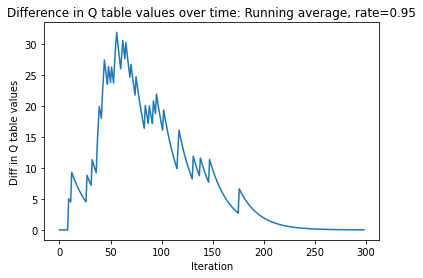

training terminated with iteration 299 with diff in q value 0.012034794698035471 above threshold 0.01


In [110]:
#!/usr/bin/python

# qlearn.py : simple discrete, deterministic Q-learning 
#
# Requires: numpy, pandas, matplotlib
#
# Yoonsuck Choe
# choe@tamu.edu
#
# 2021. 02. 17. (wed) 09:00:58 KST
# 2021. 02. 18. (thu) 00:09:00 KST
# 2022. 09. 14. (wed) 12:54:00 CST
#
# Getting started:
# 
# - pick between "console" mode (for command line) or "notebook" mode (for colab, etc). 
#     See the config section.
# 
#     mode  = "console"
#
# Suggested experiments:
#
# - change epsilon: 
#     0.1, 0.25, 0.5 (default), 0.8, 1.0 and see how the Q diff plot looks like (how fast 
#     learning converges.
#    
#     ./qlearn.pl --epsilon=0.25 
#
#     or, for notebook mode
# 
#     args.epsilon = 0.25
#     qlearn()
# 
# - change alpha: 
#     0.1, 0.25, 0.5, 0.8, 1.0 (default) and see how the Q diff plot looks like (how fast 
#     learning converges.
# 
#     ./qlearn.pl --alpha=0.25 
# 
#     or, for notebook mode
# 
#     args.alpha= 0.25
#     qlearn()
# 
# - try a new grid world environment (change section below "Environment set up".
#     search for "modify"
#
#

import numpy as np
import pandas as pd
import random 
import argparse, sys
import matplotlib.pyplot as plt

#--------------------
# config (more config below : search for "modify" 
#
# - for colab, etc, use the "notebook" mode
#--------------------

# mode = "console"
mode = "notebook" 

#--------------------
# console mode: process command line arguments
#--------------------
def parse_args():

  cmd = argparse.ArgumentParser(formatter_class=argparse.ArgumentDefaultsHelpFormatter)
  cmd.add_argument('--alpha', type=float, default="1.0", help="mixing rate")
  cmd.add_argument('--gamma', type=float, default="0.9", help="discount rate")
  cmd.add_argument('--epsilon', type=float, default="0.5", help="discount rate")
  cmd.add_argument('--num_iter', type=int, default="300", help="number of iterations to run")
  cmd.add_argument('--run_avg_rate', type=float, default="0.95", help="number of iterations to run")
  cmd.add_argument('--display_flag', type=str, default="True", help="display Q table after each iteration")
  cmd.add_argument('--run_avg_threshold', type=float, default="0.01", help="run average threshold for training loop termination")

  return cmd.parse_args()

#--------------------
# notebook mode: process command line arguments
#--------------------
class argclass:

  def __init__(self):

    self.alpha = 1.0
    self.gamma = 0.9
    self.epsilon = 0.5
    self.num_iter = 300
    self.run_avg_rate = 0.95
    self.display_flag = "True"
    self.run_avg_threshold = 0.01

#--------------------
# select mode 
#--------------------
if (mode=="console"):

  args = parse_args()

elif (mode=="notebook"):

  args = argclass()

else:

  print("Invalid mode: check the config")
  exit()

#--------------------
# find sum of absolute difference in the two table values
#--------------------
def df_diff(df1, df2):

  d = df1-df2
  return d.abs().to_numpy().sum() 

#----------------------------------------------------------------------------
#
# Environment set up : modify this part to change the environment
#
#----------------------------------------------------------------------------

#--------------------
# state index : modify
#
# layout =  (*) marks the goal. 
# 
# s0 s1 (s2)
# s3 s4 s5 
# 
#   * (s1,right) and (s5,up) has reward 100, all others are 0.
#   * All actions in s2 lead back to s2, with reward 0.
#
#--------------------
s_index = ["s0", "s1", "s2", "s3", "s4", "s5","s6","s7","s8","s9","s10","s11"] 

#--------------------
# state transition table : modify 
#--------------------
delta = pd.DataFrame(
	{ 
	  "up"   : pd.Series(np.array([-1,-1, -1,-1,0,1,2,3,4,5,6,7]),index=s_index),
	  "down" : pd.Series(np.array([ 4,5,6,7,8,9,10,11,-1,-1,-1,-1]),index=s_index),
	  "left" : pd.Series(np.array([-1,0,1,2,-1,4,5,6,-1,8,9,10]),index=s_index),
	  "right": pd.Series(np.array([ 1,2,3,-1,5,6,7,-1,9,10,11,-1]),index=s_index)
	}
)

#--------------------
# reward table : modify
#--------------------
reward = pd.DataFrame(
	{ 
    "up"   : pd.Series(np.array([-1,-1, -1,-1,0,0,100,0,0,0,0,0]),index=s_index),
	  "down" : pd.Series(np.array([ 0,0,0,0,0,0,0,0,-1,-1,-1,-1]),index=s_index),
	  "left" : pd.Series(np.array([-1,0,0,100,0,0,0,0,-1,0,0,0]),index=s_index),
	  "right": pd.Series(np.array([ 0,100,0,-1,0,0,0,-1,0,0,0,-1]),index=s_index)
	}
)

print("\n\nDelta")
print(delta)

print("\n\nReward")
print(reward)

#--------------------
# goal state : modify
#--------------------
goal = 2

#----------------------------------------------------------------------------
#
# Main algorithm : no need to modify much below here (for the deterministic case)
#
#----------------------------------------------------------------------------

def qlearn(): 

  # extract number of states
  num_states = len(s_index)
  num_actions = 4
  
  # set up (s,a) visit count
  visits = (delta>=0).astype(int)-1
  run_avg = 0
  
  #--------------------
  # (1) Initialize Q table to zeros (-1 for invalid actions)
  #
  # - Reuse delta table to filter out invalid moves and set others to zero
  #--------------------
 
  Q=(delta>=0).astype(float)-1 

  old_Q = Q.copy(deep=True) 
  
  print("\n\nQ: initial")
  print(Q)
  
  #--------------------
  # (2) Main loop
  #--------------------
  
  d = np.zeros(args.num_iter)
  
  for n in range(args.num_iter):
    
    #----------
    # 1. s : randomly select state   
    #----------
  
    s = random.randint(0,num_states-1)
  
    while (s==goal): # avoid goal state
      s = random.randint(0,num_states-1)
      
    #----------
    # 2. a : choose action (epsilon greedy policy)
    #----------
  
    if (random.random() < (1-args.epsilon)):
  
      # greedy action:
      a = Q.iloc[s,:].argmax()
  
    else:
  
      # random action
      a = random.randint(0,num_actions-1)
  
      while (delta.iloc[s,a]==-1): # avoid invalid action
        a = random.randint(0,num_actions-1)
  
    #----------
    # 3. train
    #----------
  
    visits.iloc[s,a] = visits.iloc[s,a]+1

    alpha = args.alpha
    gamma = args.gamma
  
    # 3.1 find next state from (s,a)
  
    s_next = delta.iloc[s,a]
  
    # 3.2 update Q
  
    # Equation is: Q(s,a) = (1-alpha) x Q(s,a) + alpha*( r(s,a) + gamma * max_a' Q(s',a') )
    Q.iloc[s,a] = (1.0-alpha)*Q.iloc[s,a] + alpha*(reward.iloc[s,a] + gamma*Q.iloc[s_next,:].max())
  
  
    # 3.3 compute running average of the sum of Q(n) minus Q(n-1)
  
    d[n] = args.run_avg_rate * run_avg + (1-args.run_avg_rate) * df_diff(Q,old_Q)
    run_avg = d[n]
    old_Q = Q.copy(deep=True)
   


    # 3.3 print current Q and running average of Q diff.
  
    if (args.display_flag == "True"):
  
      print("\nQ : iter="+str(n))
      print(Q)
      print("diff = "+str(d[n]))

    if (n>50  and run_avg < args.run_avg_threshold):
 
        break

  #--------------------
  # (3) Print final Q table  and (s,a) visit count table
  #--------------------
  print("\nFinal Q table\n")
  print(Q)
  
  print("\nFinal visit count table\n")
  print(visits)
  
  #--------------------
  # (4) Plot diff Q(n), Q(n-1) running average
  #--------------------
  plt.title("Difference in Q table values over time: Running average, rate="+str(args.run_avg_rate))
  plt.xlabel("Iteration")
  plt.ylabel("Diff in Q table values")
  plt.plot(d[:n])
  plt.show()

  if run_avg < args.run_avg_threshold:
    print(f"diff in Q reached below {args.run_avg_threshold} at iteration = {n}")
  else:
    print(f"training terminated with iteration {n} with diff in q value {run_avg} above threshold {args.run_avg_threshold}")

#-- end of qlearn() function def

#----------------------------------------------------------------------------
# Run the qlearn main function
#
# - if you're using notebook mode, you can change the argument and rerun
#   in the interactive session (create a new cell and put the following lines in it).
#   
#    args.epsilon = 0.8
#    qlearn()
#
#----------------------------------------------------------------------------

args.display_flag = "False"  # Set this to True to see the changing Q table over time.
args.epsilon = 1.0
qlearn()

# after you run it, check if your Delta (state transition table) and the Reward table are accurate, compared to Figure 1. 



Q: initial
      up  down  left  right
s0  -1.0   0.0  -1.0    0.0
s1  -1.0   0.0   0.0    0.0
s2  -1.0   0.0   0.0    0.0
s3  -1.0   0.0   0.0   -1.0
s4   0.0   0.0  -1.0    0.0
s5   0.0   0.0   0.0    0.0
s6   0.0   0.0   0.0    0.0
s7   0.0   0.0   0.0   -1.0
s8   0.0  -1.0  -1.0    0.0
s9   0.0  -1.0   0.0    0.0
s10  0.0  -1.0   0.0    0.0
s11  0.0  -1.0   0.0   -1.0

Final Q table

        up   down    left  right
s0    -1.0  72.90   -1.00   90.0
s1    -1.0  81.00   81.00  100.0
s2    -1.0   0.00    0.00    0.0
s3    -1.0  81.00  100.00   -1.0
s4    81.0  65.61   -1.00   81.0
s5    90.0  72.90   72.90   90.0
s6   100.0  81.00   81.00   81.0
s7    90.0  72.90   90.00   -1.0
s8    72.9  -1.00   -1.00   72.9
s9    81.0  -1.00   65.61   81.0
s10   90.0  -1.00   72.90   72.9
s11   81.0  -1.00   81.00   -1.0

Final visit count table

     up  down  left  right
s0   -1     6    -1     15
s1   -1     7     5     12
s2   -1     0     0      0
s3   -1    10    15     -1
s4    9     9    

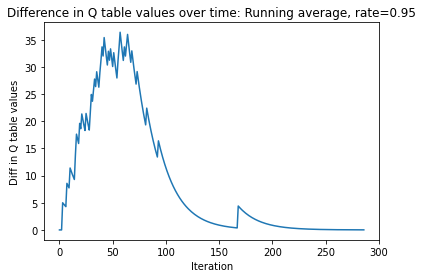

diff in Q reached below 0.01 at iteration = 287


In [ ]:
# You can also easily run a different experiment in its own code cell, like below,
# with a different set of parameters

args.epsilon=0.8
args.run_avg_rate = 0.95
qlearn()

**Answer:**

Modify the code cell above to make it to work. 


# Problem 4 (Experiment: 10pts)

**Problem 4 (Experiment: 10 pts):**

Experiment with the $\epsilon$-greedy policy. You don't need to change any code. Just change the parameter and run qlearn(). 

Test with different $\epsilon$ values to see how the $\epsilon$-greedy policy behaves. For example, $\epsilon \in {0.0, 0.1, 0.3, 0.5, 0.8, 0.9, 1.0}$. Note: $\epsilon = 0.0$ is the greedy policy and $\epsilon = 1.0$ is the random policy. ($\epsilon$-greedy chooses the greedy move with $(1-\epsilon)$ probability.).

(1) Which $\epsilon$ value tend to converge fastest? For each $\epsilon$ value, you can run multiple runs (say 5 times) and observe how long it too to converge, and take an average. You can then compare the average. 

(2) How does the number of visits table differ for different $\epsilon$ values? Based on this, how do you think $\epsilon$ affects exploration vs. exploitation? 

(3) Did some $\epsilon$ value lead the algorithm not converging (the final Q table is different from the manually calculated table from Problem 2)? If so, why do you think it did not converge? 


**Answer**

Run your experiments in the code cell below. 

(1) I calculated average number of iteration for different values of 𝜖. Convergence is faster when 𝜖 increases. Average time for convergence is 810 iterations for 𝜖=0.1 and 288 iterations for 𝜖=1. For 𝜖=0 convergence is fastest (Because the model is highly greedy - exploiting). 

(2) The visit to every state is more spread with high 𝜖 value (high exploration and less exploitation). For 𝜖=0 majority of states have 0 visits i.e the model is running as greedy. Therefore we can say that high 𝜖 leads to exploration and low 𝜖 leads to exploitation.

(3) Small 𝜖 values (0,0.1,0.2,0.3)do not converge the model i.e value to Q table is different from problem 2. At low 𝜖 value the model is greedy and do not explore all the possible options, few states does not get visited and therefore their Q values differ.




Q: initial
      up  down  left  right
s0  -1.0   0.0  -1.0    0.0
s1  -1.0   0.0   0.0    0.0
s2  -1.0   0.0   0.0    0.0
s3  -1.0   0.0   0.0   -1.0
s4   0.0   0.0  -1.0    0.0
s5   0.0   0.0   0.0    0.0
s6   0.0   0.0   0.0    0.0
s7   0.0   0.0   0.0   -1.0
s8   0.0  -1.0  -1.0    0.0
s9   0.0  -1.0   0.0    0.0
s10  0.0  -1.0   0.0    0.0
s11  0.0  -1.0   0.0   -1.0

Final Q table

        up   down    left  right
s0    -1.0  72.90   -1.00   90.0
s1    -1.0  81.00   81.00  100.0
s2    -1.0   0.00    0.00    0.0
s3    -1.0  81.00  100.00   -1.0
s4    81.0  65.61   -1.00   81.0
s5    90.0  72.90    0.00   90.0
s6   100.0  81.00   81.00   81.0
s7    90.0  72.90   90.00   -1.0
s8    72.9  -1.00   -1.00   72.9
s9    81.0  -1.00   65.61   81.0
s10   90.0  -1.00   72.90   72.9
s11   81.0  -1.00   81.00   -1.0

Final visit count table

     up  down  left  right
s0   -1     8    -1     24
s1   -1     4     4     23
s2   -1     0     0      0
s3   -1     6    22     -1
s4    4     6    

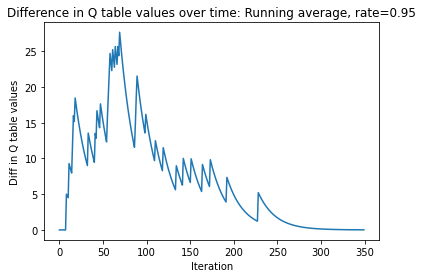

diff in Q reached below 0.01 at iteration = 350


In [ ]:
# You can quickly run multiple experiments without modifying the code above or copying and pasting the whole code. Just do something like this. Create a new code cell for a different experiment.

# Q=(delta>0).astype(float)-1.0 + (delta>0)*np.random.rand(6,4)*0.001   # add small initial random value to break the tie 
args.display_flag = "False"
args.num_iter = 900
args.epsilon = 0.4
qlearn()

**Answer:**




# Problem 5 (Programming: 20pts)

**Problem 5 (Programming: 20)**

Copy and paste the code in Problem 3, and change it to implement SARSA.

Once you're done implementing, run a few experiments to determine whether the original Q learning in Problem 3 works faster, or if the SARSA algorithm works faster (faster to converge, given the same parameter conditions). The results my vary. Please write a detailed description of your experiment and results, and whether you find the simpler SARSA to be faster to converge than the original Q learning. 




Delta
     up  down  left  right
s0   -1     4    -1      1
s1   -1     5     0      2
s2   -1     6     1      3
s3   -1     7     2     -1
s4    0     8    -1      5
s5    1     9     4      6
s6    2    10     5      7
s7    3    11     6     -1
s8    4    -1    -1      9
s9    5    -1     8     10
s10   6    -1     9     11
s11   7    -1    10     -1


Reward
      up  down  left  right
s0    -1     0    -1      0
s1    -1     0     0    100
s2    -1     0     0      0
s3    -1     0   100     -1
s4     0     0     0      0
s5     0     0     0      0
s6   100     0     0      0
s7     0     0     0     -1
s8     0    -1    -1      0
s9     0    -1     0      0
s10    0    -1     0      0
s11    0    -1     0     -1


Q: initial
      up  down  left  right
s0  -1.0   0.0  -1.0    0.0
s1  -1.0   0.0   0.0    0.0
s2  -1.0   0.0   0.0    0.0
s3  -1.0   0.0   0.0   -1.0
s4   0.0   0.0  -1.0    0.0
s5   0.0   0.0   0.0    0.0
s6   0.0   0.0   0.0    0.0
s7   0.0   0.0   0.0   -1.0
s8 

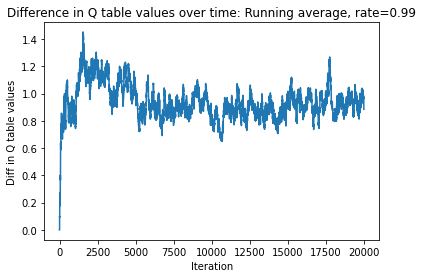

training terminated with iteration 19999 with diff in q value 0.8810955193094581 above threshold 0.01


In [111]:
#!/usr/bin/python

# qlearn.py : simple discrete, deterministic Q-learning 
#
# Requires: numpy, pandas, matplotlib
#
# Yoonsuck Choe
# choe@tamu.edu
#
# 2021. 02. 17. (wed) 09:00:58 KST
# 2021. 02. 18. (thu) 00:09:00 KST
# 2022. 09. 14. (wed) 12:54:00 CST
#
# Getting started:
# 
# - pick between "console" mode (for command line) or "notebook" mode (for colab, etc). 
#     See the config section.
# 
#     mode  = "console"
#
# Suggested experiments:
#
# - change epsilon: 
#     0.1, 0.25, 0.5 (default), 0.8, 1.0 and see how the Q diff plot looks like (how fast 
#     learning converges.
#    
#     ./qlearn.pl --epsilon=0.25 
#
#     or, for notebook mode
# 
#     args.epsilon = 0.25
#     qlearn()
# 
# - change alpha: 
#     0.1, 0.25, 0.5, 0.8, 1.0 (default) and see how the Q diff plot looks like (how fast 
#     learning converges.
# 
#     ./qlearn.pl --alpha=0.25 
# 
#     or, for notebook mode
# 
#     args.alpha= 0.25
#     qlearn()
# 
# - try a new grid world environment (change section below "Environment set up".
#     search for "modify"
#
#

import numpy as np
import pandas as pd
import random 
import argparse, sys
import matplotlib.pyplot as plt

#--------------------
# config (more config below : search for "modify" 
#
# - for colab, etc, use the "notebook" mode
#--------------------

# mode = "console"
mode = "notebook" 

#--------------------
# console mode: process command line arguments
#--------------------
def parse_args():

  cmd = argparse.ArgumentParser(formatter_class=argparse.ArgumentDefaultsHelpFormatter)
  cmd.add_argument('--alpha', type=float, default="1.0", help="mixing rate")
  cmd.add_argument('--gamma', type=float, default="0.9", help="discount rate")
  cmd.add_argument('--epsilon', type=float, default="0.5", help="discount rate")
  cmd.add_argument('--num_iter', type=int, default="300", help="number of iterations to run")
  cmd.add_argument('--run_avg_rate', type=float, default="0.95", help="number of iterations to run")
  cmd.add_argument('--display_flag', type=str, default="True", help="display Q table after each iteration")
  cmd.add_argument('--run_avg_threshold', type=float, default="0.01", help="run average threshold for training loop termination")

  return cmd.parse_args()

#--------------------
# notebook mode: process command line arguments
#--------------------
class argclass:

  def __init__(self):

    self.alpha = 0.1
    self.gamma = 0.9
    self.epsilon = 0.5
    self.num_iter = 20000
    self.run_avg_rate = 0.99
    self.display_flag = "True"
    self.run_avg_threshold = 0.01

#--------------------
# select mode 
#--------------------
if (mode=="console"):

  args = parse_args()

elif (mode=="notebook"):

  args = argclass()

else:

  print("Invalid mode: check the config")
  exit()

#--------------------
# find sum of absolute difference in the two table values
#--------------------
def df_diff(df1, df2):

  d = df1-df2
  return d.abs().to_numpy().sum() 

#----------------------------------------------------------------------------
#
# Environment set up : modify this part to change the environment
#
#----------------------------------------------------------------------------

#--------------------
# state index : modify
#
# layout =  (*) marks the goal. 
# 
# s0 s1 (s2)
# s3 s4 s5 
# 
#   * (s1,right) and (s5,up) has reward 100, all others are 0.
#   * All actions in s2 lead back to s2, with reward 0.
#
#--------------------
s_index = ["s0", "s1", "s2", "s3", "s4", "s5","s6","s7","s8","s9","s10","s11"] 

#--------------------
# state transition table : modify 
#--------------------
delta = pd.DataFrame(
	{ 
	  "up"   : pd.Series(np.array([-1,-1, -1,-1,0,1,2,3,4,5,6,7]),index=s_index),
	  "down" : pd.Series(np.array([ 4,5,6,7,8,9,10,11,-1,-1,-1,-1]),index=s_index),
	  "left" : pd.Series(np.array([-1,0,1,2,-1,4,5,6,-1,8,9,10]),index=s_index),
	  "right": pd.Series(np.array([ 1,2,3,-1,5,6,7,-1,9,10,11,-1]),index=s_index)
	}
)

#--------------------
# reward table : modify
#--------------------
reward = pd.DataFrame(
	{ 
    "up"   : pd.Series(np.array([-1,-1, -1,-1,0,0,100,0,0,0,0,0]),index=s_index),
	  "down" : pd.Series(np.array([ 0,0,0,0,0,0,0,0,-1,-1,-1,-1]),index=s_index),
	  "left" : pd.Series(np.array([-1,0,0,100,0,0,0,0,-1,0,0,0]),index=s_index),
	  "right": pd.Series(np.array([ 0,100,0,-1,0,0,0,-1,0,0,0,-1]),index=s_index)
	}
)

print("\n\nDelta")
print(delta)

print("\n\nReward")
print(reward)

#--------------------
# goal state : modify
#--------------------
goal = 2

#----------------------------------------------------------------------------
#
# Main algorithm : no need to modify much below here (for the deterministic case)
#
#----------------------------------------------------------------------------

def qlearn(): 

  # extract number of states
  num_states = len(s_index)
  num_actions = 4
  
  # set up (s,a) visit count
  visits = (delta>=0).astype(int)-1
  run_avg = 0
  
  #--------------------
  # (1) Initialize Q table to zeros (-1 for invalid actions)
  #
  # - Reuse delta table to filter out invalid moves and set others to zero
  #--------------------
 
  Q=(delta>=0).astype(float)-1 

  old_Q = Q.copy(deep=True) 
  
  print("\n\nQ: initial")
  print(Q)
  
  #--------------------
  # (2) Main loop
  #--------------------
  
  d = np.zeros(args.num_iter)
  
  for n in range(args.num_iter):
    
    #----------
    # 1. s : randomly select state   
    #----------
  
    s = random.randint(0,num_states-1)
  
    while (s==goal): # avoid goal state
      s = random.randint(0,num_states-1)
      
    #----------
    # 2. a : choose action (epsilon greedy policy)
    #----------
  
    if (random.random() < (1-args.epsilon)):
  
      # greedy action:
      a = Q.iloc[s,:].argmax()
  
    else:
  
      # random action
      a = random.randint(0,num_actions-1)
  
      while (delta.iloc[s,a]==-1): # avoid invalid action
        a = random.randint(0,num_actions-1)
  
    #----------
    # 3. train
    #----------
  
    visits.iloc[s,a] = visits.iloc[s,a]+1

    alpha = args.alpha
    gamma = args.gamma
  
    # 3.1 find next state from (s,a)
  
    s_next = delta.iloc[s,a]

    if (random.random() < (1-args.epsilon)):
  
      # greedy action:
      a_next = Q.iloc[s_next,:].argmax()
  
    else:
  
      # random action
      a_next = random.randint(0,num_actions-1)
  
      while (delta.iloc[s_next,a_next]==-1): # avoid invalid action
        a_next = random.randint(0,num_actions-1)
    
  
    # 3.2 update Q
  
    # Equation is: Q(s,a) = (1-alpha) x Q(s,a) + alpha*( r(s,a) + gamma * max_a' Q(s',a') )
    Q.iloc[s,a] = (1.0-alpha)*Q.iloc[s,a] + alpha*(reward.iloc[s,a] + gamma*Q.iloc[s_next,a_next])
  
  
    # 3.3 compute running average of the sum of Q(n) minus Q(n-1)
  
    d[n] = args.run_avg_rate * run_avg + (1-args.run_avg_rate) * df_diff(Q,old_Q)
    run_avg = d[n]
    old_Q = Q.copy(deep=True)
   


    # 3.3 print current Q and running average of Q diff.
  
    if (args.display_flag == "True"):
  
      print("\nQ : iter="+str(n))
      print(Q)
      print("diff = "+str(d[n]))

    if (n>50  and run_avg < args.run_avg_threshold):
 
        break

  #--------------------
  # (3) Print final Q table  and (s,a) visit count table
  #--------------------
  print("\nFinal Q table\n")
  print(Q)
  
  print("\nFinal visit count table\n")
  print(visits)
  
  #--------------------
  # (4) Plot diff Q(n), Q(n-1) running average
  #--------------------
  plt.title("Difference in Q table values over time: Running average, rate="+str(args.run_avg_rate))
  plt.xlabel("Iteration")
  plt.ylabel("Diff in Q table values")
  plt.plot(d[:n])
  plt.show()

  if run_avg < args.run_avg_threshold:
    print(f"diff in Q reached below {args.run_avg_threshold} at iteration = {n}")
  else:
    print(f"training terminated with iteration {n} with diff in q value {run_avg} above threshold {args.run_avg_threshold}")

#-- end of qlearn() function def

#----------------------------------------------------------------------------
# Run the qlearn main function
#
# - if you're using notebook mode, you can change the argument and rerun
#   in the interactive session (create a new cell and put the following lines in it).
#   
#    args.epsilon = 0.8
#    qlearn()
#
#----------------------------------------------------------------------------

args.display_flag = "False"  # Set this to True to see the changing Q table over time.
args.epsilon = 1.0
qlearn()

# after you run it, check if your Delta (state transition table) and the Reward table are accurate, compared to Figure 1. 

**Answer**
Original Q learning of problem 3 works better then SARSA. Q learning model was able to converge in 300 iterations, whereas even after increasing the iteration to 20,000 we could not see convergence in SARSA. 



# Section II. Stochastic Case (total 30 points)

Consider a stochastic version of the reinforcement learning problem posed in Section 1 (figure copied below). Modify the rules so that:

* $\delta(s,a)$ is stochastic: The probability of landing in the intended direction is $0.70$. The probability of landing in one of $n$ unintended legal direction is $\frac{0.30}{n}$.

  * Example 1 : If you are in $s_0$ and action $a$ was $right$, probability of landing in $s_1$ is 0.70, and ending up in $s_4$ is 0.3. 
    * Note that $\delta(s_0,right)=s_1$ and $\delta(s_0,down)=s_4$, respectively.

  * Example 2: If you are in $s_1$ and $a$ was $down$, probability of landing in $s_5$ is 0.70, ending up in $s_0$ is 0.15 (= 0.3/2), and ending up in $s_2$ is 0.15 (= 0.3/2). 
    * Note that in the deterministic case, $\delta(s_1,down)=s_5$, $\delta(s_1,left)=s_0$,   and $\delta(s_1,right)=s_2$, respectively.

  * Example 3: If you are in $s_6$ and $a$ was $left$, probability of landing in $s_5$ is 0.70, ending up in $s_2$ is 0.1 (= 0.3/3), ending up in $s_7$ is 0.1 (= 0.3/3), and ending up in $s_{10}$ is 0.1 (= 0.3/3)
    * Note that in the deterministic case, $\delta(s_6,left)=s_5$, $\delta(s_6,up)=s_2$, $\delta(s_6,right)=s_{7}$, and $\delta(s_6,down)=s_{10}$, respectively.

* Reward $r(s,a)$ depends on where you landed based on the above. All rewards are 0 unless the resulting state was the goal state $s_2$. For example, if you were in $s_3$ and the action was $a=down$, with 15\% chance you will land in $s_2$, the goal state. In this case, $\delta(s_3,down)=s_2$, and thus $r(s_3, right) = 100$ for that specific run. In a different run, with the same action $right$, if you landed in $s_{7}$, then $r(s_3,down) = 0$. So, $r(s_3,down)$ can be either 0 or 100, depending on the random outcome.

<figure>
<center>
<img src="https://github.com/yschoe/pub-data/blob/main/grid-goal2-v2.png?raw=true">
<figcaption>Figure 2: same as Figure 1 </figcaption></center>
</figure>




# Problem 6 (Program: 20pts)

**Problem 6 (Program: 20 pts):**

Modify the program in problem 3, so that the environment acts stochastically, as defined in Section II. The code below shows how to generate random outcomes with a certain probability. 

The learning rule has to be modified to the one shown in slide04-rl.pdf, page 35. 

> $\hat{Q}_n(s,a) \leftarrow (1-\alpha_n) \hat{Q}_{n-1}(s,a) + \alpha_n \left[ r + \gamma \max_{a'} \hat{Q}_{n-1}(s',a') \right],$ 
> 
> where $\alpha_n = \frac{1}{1+visits_s(s,a)}$

(1) Modify the code from problem 3.

(2) Run the experiment, and show the resulting $Q$ table. You should experiment with the $\alpha$ parameter to get the correct result. Use the random policy. $\gamma = 0.9$, as usual.  


(3) Set up another table Sum_Ersa to compute the sum of all reward you observed when visiting the $(s,a)$ pairs. This table should be the same size as the Q table. When a specific state action pair is visited ($(s,a)$ is "visited", when $s$ and $a$ are randomly generated in the main loop, to update $Q(s,a)$), say $(s_4, right)$, observe the reward ($r$), and add it to the appropriate Sum_Ersa location:
```
Sum_Ersa.iloc[5,3] = r + Sum_Ersa.iloc[5,3]    # Note: (index of s1 is 2, and index of right is 1)
```
or
```
Sum_Ersa.loc["s1","down"] = r + Sum_Ersa.loc["s1","down"]    # Using loc, instead of iloc.
```
Finally, after your training terminates, compute an estimate of $E[r(s,a)]$, based on the Sum_Ersa  table and the visits table (this visits table is already implemented). 

> $E[r(s,a)] \sim \frac{\sum_{\forall \mbox{visits to } (s,a)} (\mbox{observed  reward }, r)}{\mbox{visits}(s,a)}$

Store the results in a table named:
```
Ersa = ...
```

Print out the results.

(4) Compare $E[r(s_6,right)]$ with the manually computed value from Problem 7 (below). Are they comparable?


**Answer:**

(1) Write your code in the code cell below.

(2)

(3)

(4)





Delta
     up  down  left  right
s0   -1     4    -1      1
s1   -1     5     0      2
s2   -1     6     1      3
s3   -1     7     2     -1
s4    0     8    -1      5
s5    1     9     4      6
s6    2    10     5      7
s7    3    11     6     -1
s8    4    -1    -1      9
s9    5    -1     8     10
s10   6    -1     9     11
s11   7    -1    10     -1


Reward
      up  down  left  right
s0    -1     0    -1      0
s1    -1     0     0    100
s2    -1     0     0      0
s3    -1     0   100     -1
s4     0     0     0      0
s5     0     0     0      0
s6   100     0     0      0
s7     0     0     0     -1
s8     0    -1    -1      0
s9     0    -1     0      0
s10    0    -1     0      0
s11    0    -1     0     -1


Q: initial
      up  down  left  right
s0  -1.0   0.0  -1.0    0.0
s1  -1.0   0.0   0.0    0.0
s2  -1.0   0.0   0.0    0.0
s3  -1.0   0.0   0.0   -1.0
s4   0.0   0.0  -1.0    0.0
s5   0.0   0.0   0.0    0.0
s6   0.0   0.0   0.0    0.0
s7   0.0   0.0   0.0   -1.0
s8 

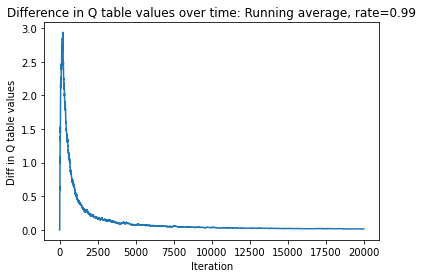

training terminated with iteration 19999 with diff in q value 0.015623559524670474 above threshold 0.01


In [134]:
# Write your code here, for the nondeterministic Q-learning algorithm.
#!/usr/bin/python

# qlearn.py : simple discrete, deterministic Q-learning 
#
# Requires: numpy, pandas, matplotlib
#
# Yoonsuck Choe
# choe@tamu.edu
#
# 2021. 02. 17. (wed) 09:00:58 KST
# 2021. 02. 18. (thu) 00:09:00 KST
# 2022. 09. 14. (wed) 12:54:00 CST
#
# Getting started:
# 
# - pick between "console" mode (for command line) or "notebook" mode (for colab, etc). 
#     See the config section.
# 
#     mode  = "console"
#
# Suggested experiments:
#
# - change epsilon: 
#     0.1, 0.25, 0.5 (default), 0.8, 1.0 and see how the Q diff plot looks like (how fast 
#     learning converges.
#    
#     ./qlearn.pl --epsilon=0.25 
#
#     or, for notebook mode
# 
#     args.epsilon = 0.25
#     qlearn()
# 
# - change alpha: 
#     0.1, 0.25, 0.5, 0.8, 1.0 (default) and see how the Q diff plot looks like (how fast 
#     learning converges.
# 
#     ./qlearn.pl --alpha=0.25 
# 
#     or, for notebook mode
# 
#     args.alpha= 0.25
#     qlearn()
# 
# - try a new grid world environment (change section below "Environment set up".
#     search for "modify"
#
#

import numpy as np
import pandas as pd
import random 
import argparse, sys
import matplotlib.pyplot as plt

#--------------------
# config (more config below : search for "modify" 
#
# - for colab, etc, use the "notebook" mode
#--------------------

# mode = "console"
mode = "notebook" 

#--------------------
# console mode: process command line arguments
#--------------------
def parse_args():

  cmd = argparse.ArgumentParser(formatter_class=argparse.ArgumentDefaultsHelpFormatter)
  cmd.add_argument('--alpha', type=float, default="1.0", help="mixing rate")
  cmd.add_argument('--gamma', type=float, default="0.9", help="discount rate")
  cmd.add_argument('--epsilon', type=float, default="0.5", help="discount rate")
  cmd.add_argument('--num_iter', type=int, default="300", help="number of iterations to run")
  cmd.add_argument('--run_avg_rate', type=float, default="0.95", help="number of iterations to run")
  cmd.add_argument('--display_flag', type=str, default="True", help="display Q table after each iteration")
  cmd.add_argument('--run_avg_threshold', type=float, default="0.01", help="run average threshold for training loop termination")

  return cmd.parse_args()

#--------------------
# notebook mode: process command line arguments
#--------------------
class argclass:

  def __init__(self):

    self.alpha = 1
    self.gamma = 0.9
    self.epsilon = 0.99
    self.num_iter = 20000
    self.run_avg_rate = 0.99
    self.display_flag = "False"
    self.run_avg_threshold = 0.01

#--------------------
# select mode 
#--------------------
if (mode=="console"):

  args = parse_args()

elif (mode=="notebook"):

  args = argclass()

else:

  print("Invalid mode: check the config")
  exit()

#--------------------
# find sum of absolute difference in the two table values
#--------------------
def df_diff(df1, df2):

  d = df1-df2
  return d.abs().to_numpy().sum() 

#----------------------------------------------------------------------------
#
# Environment set up : modify this part to change the environment
#
#----------------------------------------------------------------------------

#--------------------
# state index : modify
#
# layout =  (*) marks the goal. 
# 
# s0 s1 (s2)
# s3 s4 s5 
# 
#   * (s1,right) and (s5,up) has reward 100, all others are 0.
#   * All actions in s2 lead back to s2, with reward 0.
#
#--------------------
s_index = ["s0", "s1", "s2", "s3", "s4", "s5","s6","s7","s8","s9","s10","s11"] 

#--------------------
# state transition table : modify 
#--------------------
delta = pd.DataFrame(
	{ 
	  "up"   : pd.Series(np.array([-1,-1, -1,-1,0,1,2,3,4,5,6,7]),index=s_index),
	  "down" : pd.Series(np.array([ 4,5,6,7,8,9,10,11,-1,-1,-1,-1]),index=s_index),
	  "left" : pd.Series(np.array([-1,0,1,2,-1,4,5,6,-1,8,9,10]),index=s_index),
	  "right": pd.Series(np.array([ 1,2,3,-1,5,6,7,-1,9,10,11,-1]),index=s_index)
	}
)

#--------------------
# reward table : modify
#--------------------
reward = pd.DataFrame(
	{ 
    "up"   : pd.Series(np.array([-1,-1, -1,-1,0,0,100,0,0,0,0,0]),index=s_index),
	  "down" : pd.Series(np.array([ 0,0,0,0,0,0,0,0,-1,-1,-1,-1]),index=s_index),
	  "left" : pd.Series(np.array([-1,0,0,100,0,0,0,0,-1,0,0,0]),index=s_index),
	  "right": pd.Series(np.array([ 0,100,0,-1,0,0,0,-1,0,0,0,-1]),index=s_index)
	}
)

print("\n\nDelta")
print(delta)

print("\n\nReward")
print(reward)

#--------------------
# goal state : modify
#--------------------
goal = 2

#----------------------------------------------------------------------------
#
# Main algorithm : no need to modify much below here (for the deterministic case)
#
#----------------------------------------------------------------------------
def random_event(p):
  
  while (True):

    a = random.randint(0,3) # generate rondom event "a"
    r = random.random()  

    if (r <= p[a]):  
      # accept event "a"!
      return a
    else:
      # reject event "a" and repeat
      continue
      
def qlearn2(): 

  # extract number of states
  num_states = len(s_index)
  num_actions = 4
  
  # set up (s,a) visit count
  visits = (delta>=0).astype(int)-1
  run_avg = 0
  
  #--------------------
  # (1) Initialize Q table to zeros (-1 for invalid actions)
  #
  # - Reuse delta table to filter out invalid moves and set others to zero
  #--------------------
 
  Q=(delta>=0).astype(float)-1 
  Sum_Ersa = Q.copy(deep=True)

  old_Q = Q.copy(deep=True) 
  
  print("\n\nQ: initial")
  print(Q)
  
  
  #--------------------
  # (2) Main loop
  #--------------------
  
  d = np.zeros(args.num_iter)
  
  for n in range(args.num_iter):
    
    #----------
    # 1. s : randomly select state   
    #----------
  
    s = random.randint(0,num_states-1)
  
    while (s==goal): # avoid goal state
      s = random.randint(0,num_states-1)
      
    #----------
    # 2. a : choose action (epsilon greedy policy)
    #----------
  
    if (random.random() < (1-args.epsilon)):
  
      # greedy action:
      a = Q.iloc[s,:].argmax()
  
    else:
  
      # random action
      a = random.randint(0,num_actions-1)
  
      while (delta.iloc[s,a]==-1): # avoid invalid action
        a = random.randint(0,num_actions-1)
  
    #----------
    # 3. train
    #----------
  
    visits.iloc[s,a] = visits.iloc[s,a]+1

    alpha = args.alpha
    gamma = args.gamma
  
    # 3.1 find next state from (s,a)
  
    s_next = delta.iloc[s,a]

    num_invalid = np.count_nonzero(delta.iloc[s,:]== -1)

    num_valid = 4 - num_invalid
    numdiv = num_valid -1
    p_state = 0.3/numdiv
    P = np.zeros(4)
    for i in range(4):
      if delta.iloc[s,i] == -1:
        P[i] = 0
      elif i ==a:
        P[i] = 0.7
      else:
        P[i] = p_state

    
    while(True):
      action = random.randint(0,3)
      r = random.random()

      if (r <= P[action] and P[action]!=0):
        next_a = action
        break
      else:
        continue

    s_next = delta.iloc[s, next_a]






  
    # 3.2 update Q

    alpha = 1/(1+ visits.iloc[s,a])
    Sum_Ersa.iloc[s,a] = reward.iloc[s,next_a] + Sum_Ersa.iloc[s,a]
  
    # Equation is: Q(s,a) = (1-alpha) x Q(s,a) + alpha*( r(s,a) + gamma * max_a' Q(s',a') )
    Q.iloc[s,a] = (1.0-alpha)*Q.iloc[s,a] + alpha*(reward.iloc[s,next_a] + gamma*Q.iloc[s_next,:].max())
  
  
    # 3.3 compute running average of the sum of Q(n) minus Q(n-1)
  
    d[n] = args.run_avg_rate * run_avg + (1-args.run_avg_rate) * df_diff(Q,old_Q)
    run_avg = d[n]
    old_Q = Q.copy(deep=True)
   


    # 3.3 print current Q and running average of Q diff.
  
    if (args.display_flag == "True"):
  
      print("\nQ : iter="+str(n))
      print(Q)
      print("diff = "+str(d[n]))

    if (n>50  and run_avg < args.run_avg_threshold):
 
        break

  #--------------------
  # (3) Print final Q table  and (s,a) visit count table
  #--------------------
  print("\nFinal Q table\n")
  print(Q)

  print("\nFinal visit count table\n")
  print(visits)

  print("\nERSA\n")

  ERSA = Sum_Ersa/visits
  print(ERSA)

  #--------------------
  # (4) Plot diff Q(n), Q(n-1) running average
  #--------------------
  plt.title("Difference in Q table values over time: Running average, rate="+str(args.run_avg_rate))
  plt.xlabel("Iteration")
  plt.ylabel("Diff in Q table values")
  plt.plot(d[:n])
  plt.show()

  if run_avg < args.run_avg_threshold:
    print(f"diff in Q reached below {args.run_avg_threshold} at iteration = {n}")
  else:
    print(f"training terminated with iteration {n} with diff in q value {run_avg} above threshold {args.run_avg_threshold}")
  return(Q,ERSA)
#-- end of qlearn() function def

#----------------------------------------------------------------------------
# Run the qlearn main function
#
# - if you're using notebook mode, you can change the argument and rerun
#   in the interactive session (create a new cell and put the following lines in it).
#   
#    args.epsilon = 0.8
#    qlearn()
#
#----------------------------------------------------------------------------

args.display_flag = "False"  # Set this to True to see the changing Q table over time.
args.epsilon = 1.0
Q,ERSA = qlearn2()

# after you run it, check if your Delta (state transition table) and the Reward table are accurate, compared to Figure 1. 

(array([190.,   0.,   0.,  88.,   0.,   0.,   0., 423.,   0.,   0., 299.]),
 array([0.        , 0.27272727, 0.54545455, 0.81818182, 1.09090909,
        1.36363636, 1.63636364, 1.90909091, 2.18181818, 2.45454545,
        2.72727273, 3.        ]),
 <a list of 11 Patch objects>)

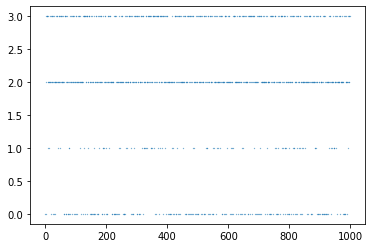

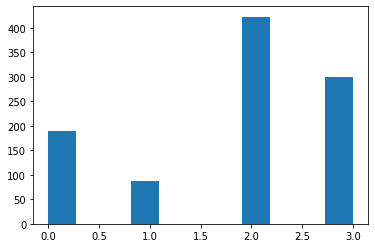

In [132]:
# Rejection method example code

import numpy as np
import matplotlib.pyplot as plt
import random

# 1. set up probability for 4 events
P = np.array([0.2, 0.1, 0.4, 0.3])

# 2. function definition: generate random event : returns 
def random_event(p):
  
  while (True):

    a = random.randint(0,3) # generate rondom event "a"
    r = random.random()  

    if (r <= p[a]):  
      # accept event "a"!
      return a
    else:
      # reject event "a" and repeat
      continue

# 3. simulation 

n = 1000

outcome = np.zeros(n)

for i in range(n):
  outcome[i] = random_event(P)

# 4. plot sampled events
fig=plt.figure()
plt.plot(outcome,".",markersize=0.5)

# 5. plot histogram : Note: for event 0, 1, 2, 3, the count would be around 200, 100, 400, and 300. 

fig2=plt.figure()
plt.hist(outcome,bins='auto')



# Problem 7 & 8 (Written: 10 pts)

**Problem 7 (written: 5 pts)**

Compute $E[r(s_6,right)]$ by hand, given the above info (Figure 2, and the description).

$E[\cdot]$ is the expected value operator. $E[X] = \sum_{i=0}^n x_i p_i $, where $X$ is a random variable, $x_i$ ($i=0 .. n$) is a value $X$ can take, and $p_i$ is the probability of observing $x_i$.  

So, to compute $E[r(s_6,right)]$, you need to find all possible reward values ($x_i$) and their probabilities ($p_i$), then plug it into the above equation. See Figure 2 (right) to find these values.

Answer 7:    𝐸[𝑟(𝑠6,𝑟𝑖𝑔ℎ𝑡)] = 0.7*(reward S7) + (0.3/3)*(reward S2) + (0.3/3)*(reward S5) + (0.3/3)*(reward S10)

            𝐸[𝑟(𝑠6,𝑟𝑖𝑔ℎ𝑡)] = 0.7*0 + 0.1*100 + 0.1*0 + 0.1*0 = 10


**Problem 8 (Written: 5 pts):**

Using the simulation results from Problem 6, show that the following relationship holds, approximately.


For $s=s_6, a=right$, verify if the following equation in slide04-rl.pdf page 34 is approximately accurate. 


> $ Q(s,a) =      E[r(s,a)] + \gamma \sum_{s'} P(s'|s,a) \max_{a'} Q(s',a') $

For this, on the left hand side, you will simply look up your $Q$ table. The $P(s'|s,a)$ are defined in the beginning of Section II: It is 0.70 for the intended direction, and 0.1, 0.15, or 0.3 for unintended directions, depending on the number of legal moves from $s$.

```
Q.iloc[s,a]
```

On the right hand side, you will compute 

```
Ersa.iloc[s,a] + args.gamma * ( .... + p * Q.iloc[s_prime,:].max() + .... )    

# p = 0.7, if s_prime was in the intended direction, and 
# p = 0.1 or 0.15 or 0.3, for unintended direction, depending on the number of
# legal moves from s.  
``` 
Verify the above two are nearly identical. 
1. Q.iloc[s,a]
2. Ersa.iloc[s,a] + args.gamma * ( ....+ p * Q.iloc[s_prime,:].max() + .... )    



In [141]:

RHS = (delta>=0).astype(float)-1

for state in range(12):
  for action in range(4):
    prob = [0,0,0,0]
  
    prob[action] = 0.7

    c=-1
    for actions in delta.iloc[state,:]:
      if action != -1:
        c = c+1
      else:
        continue
  

    for act in range(4) :
      if delta.iloc[state, act] == -1 or  act==action :
        continue
      else:
        prob[act] = 0.3/c

    final_a = random_event(np.array(prob))  
    sum=0
    for i in range(4):
      s_next = delta.iloc[state,i]
      sum = sum + args.gamma * prob[i] * Q.iloc[s_next,:].max()
    if RHS.iloc[state,action] >=0:
      RHS.iloc[state,action] = ERSA.iloc[state,action] + sum 
print("\nQ.iloc[s,a]\n")
print(Q)
print("\nRHS\n")
print(RHS)


Q.iloc[s,a]

            up       down       left      right
s0   -1.000000  51.266194  -1.000000  64.537807
s1   -1.000000  61.736180  60.150169  86.908688
s2   -1.000000   0.000000   0.000000   0.000000
s3   -1.000000  70.317057  87.973935  -1.000000
s4   49.573032  36.601534  -1.000000  51.572464
s5   68.118606  45.520513  45.169370  65.889925
s6   85.340827  55.799662  60.886574  61.293294
s7   70.526245  52.117281  67.121400  -1.000000
s8   39.673421  -1.000000  -1.000000  38.818096
s9   51.415357  -1.000000  35.591606  48.655121
s10  64.362928  -1.000000  45.509622  46.754845
s11  55.589726  -1.000000  53.214400  -1.000000

RHS

            up       down       left      right
s0   -1.000000  40.312434  -1.000000  59.393995
s1   -1.000000  62.367051  61.572101  83.246378
s2   -1.000000        NaN        NaN        NaN
s3   -1.000000  73.964651  78.279059  -1.000000
s4   50.360101  36.933332  -1.000000  52.293732
s5   71.702051  52.535653  52.620491  70.855407
s6   86.244556  61.3